# Testes de Hipóteses

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#from vega_datasets import data
import seaborn as sns
sns.set()

In [2]:
# Tamanho default das figuras
matplotlib.rcParams['figure.figsize'] = (15.0, 9.0)

In [3]:
# Carregando dataset
alcohol_consumption = pd.read_csv('../databases/student-mat.zip', compression='zip')
alcohol_consumption.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Teste 1

Hipótese nula: O álcool afeta as notas dos alunos

Hipótese alternativa: O álcool não afeta as notas dos alunos

<AxesSubplot:xlabel='age', ylabel='alc_consump'>

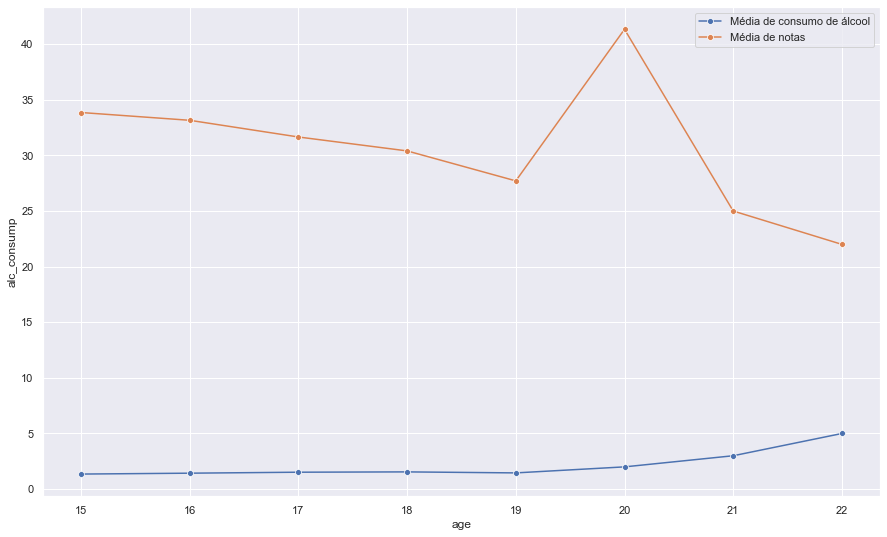

In [37]:
sum_column = alcohol_consumption["G1"] + alcohol_consumption["G2"] + alcohol_consumption["G3"]
#sum_column

alcohol_consumption['grades_sum'] = sum_column
#alcohol_consumption

a_per_year = (alcohol_consumption.groupby('age')
              .agg({'grades_sum': 'mean'})
              .reset_index())
              #.rename(columns={'Dalc':'alc_consump'}))

a_per_year

a_per_year_2 = (alcohol_consumption.groupby('age')
              .agg({'Dalc': 'mean'})
              .reset_index())

new_column = a_per_year_2['Dalc']

a_per_year['alc_consump'] = new_column

a_per_year

# sns.barplot(
#     a_per_year['notas'],
#     a_per_year['alc_consump'],
# )

sns.lineplot(x='age', y='alc_consump', marker='o',
                         data=a_per_year, label='Média de consumo de álcool', sort=False)
sns.lineplot(x='age', y='grades_sum', marker='o',
                         data=a_per_year, label='Média de notas', sort=False)

# # Título do plot
# plt.title("Média das notas de acordo com consumo de álcool", fontsize=18)
# # Nome do eixo x
# plt.xlabel('notas')
# # Nome do eixo y
# plt.ylabel('alc_consump')
# plt.show()

In [38]:
def ic(df, column):
    data = df[column]
    mean = data.mean()
    std = data.std(ddof=1)
    se = std / np.sqrt(len(data))
    
    return (mean - 1.96 * se, mean + 1.96 * se)

In [39]:
ic(a_per_year, 'grades_sum')

(26.520659449008228, 34.75550845248633)

In [40]:
a_per_year_2['grades_sum'] = a_per_year['grades_sum']

In [41]:
ic(a_per_year_2, 'grades_sum')

(26.520659449008228, 34.75550845248633)

In [42]:
# Boostrap da diferenca das medias com amostras
def bootstrap_diff(df1=a_per_year, df2=a_per_year_2, column='grades_sum', n=5000):
    '''
    df1: dataframe com consumo de álcool
    df2: dataframe sem consumo de álcool
    column: a coluna que queremos focar
    n: número de amostras para o bootstrap
    '''
    values = np.zeros(n)
    for i in range(n):
        sample1 = df1[column].sample(len(df1), replace=True)
        sample2 = df2[column].sample(len(df2), replace=True)
        values[i] = sample1.mean() - sample2.mean()
    return values

In [43]:
diff = bootstrap_diff()

In [44]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

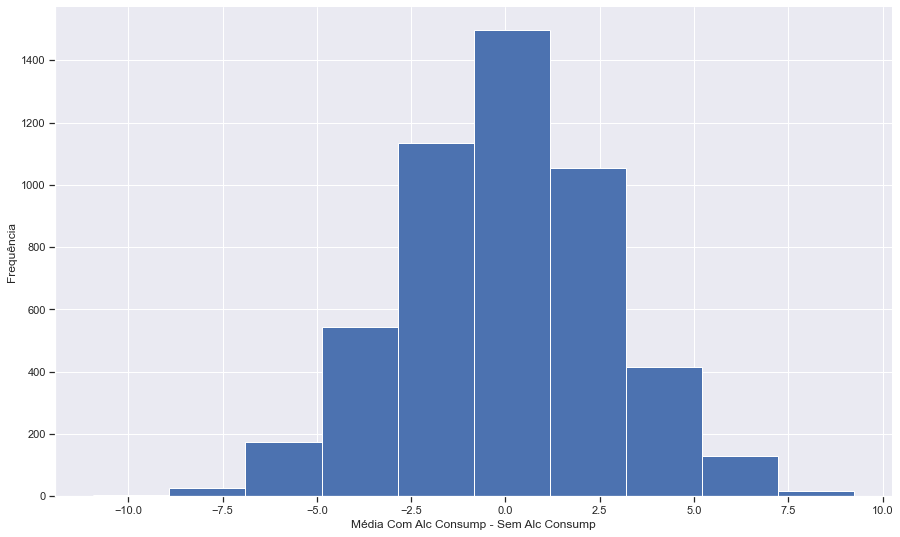

In [45]:
plt.hist(diff)
plt.xlabel('Média Com Alc Consump - Sem Alc Consump')
plt.ylabel('Frequência')
despine()